# Parametric maps
This notebook demonstrates how parametric maps can be made. In such parametric images, pixel intensity corresponds to  measurements of the objects, for example area.

In [1]:
import numpy as np
from skimage.io import imread
from skimage.measure import label, regionprops, regionprops_table
from skimage.util import map_array
from napari_simpleitk_image_processing import label_statistics
from stackview import insight, imshow

C:\Users\rober\miniforge3\envs\bio9\lib\site-packages\networkx\utils\backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
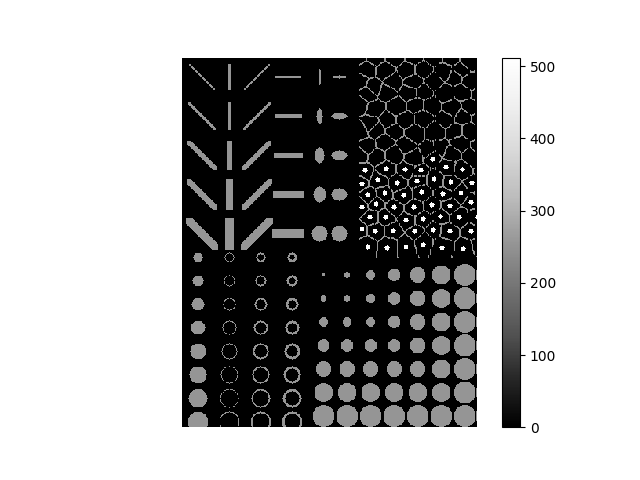
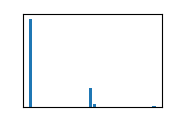

In [2]:
image = imread("data/artificial_objects_2d.tif")[:472,:376]
insight(image)

Starting point for measurements is commonly a label image.

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
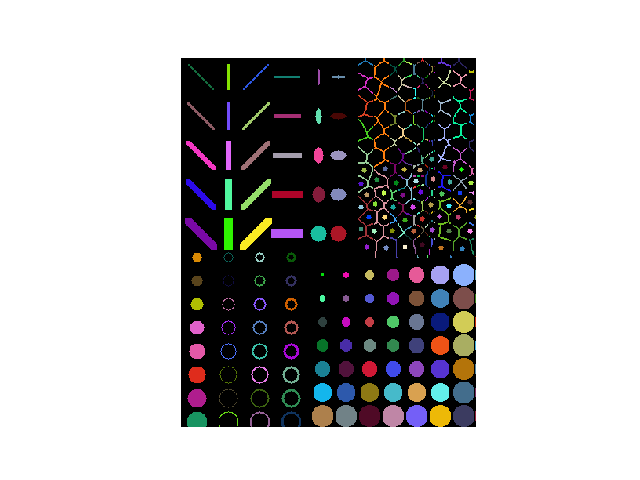

In [3]:
label_image = label(image)
insight(label_image)

## Parametric maps using scikit-image
You can also compute your own measurement for each object and then visualize it in a parametric map image. Consider using [scikit-image's `regionprops()`](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops) for computing the measurements.

In [4]:
statistics_table = regionprops_table(label_image, properties=('label', 'area','major_axis_length','minor_axis_length'))

## Area map

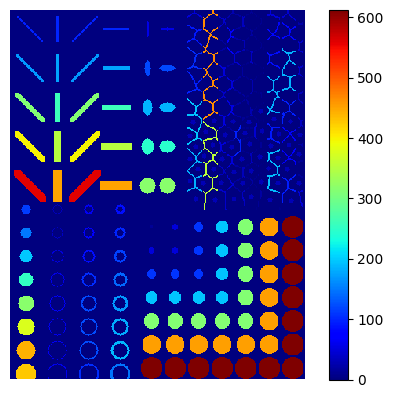

In [5]:
remapped = map_array(
        label_image,
        statistics_table['label'],
        statistics_table['area'],
        )

imshow(remapped, colorbar=True, colormap="jet")

## Parametric maps using SimpleITK-based measurements
Furthermore, also [SimpleITK](https://simpleitk.readthedocs.io/) comes with quantitative measurements for labeled images. For convenience reasons, we will use the scriptable napari plugin [napari-simpleitk-image-processing](https://github.com/haesleinhuepf/napari-simpleitk-image-processing) for deriving measurements.

In [6]:
statistics_sitk = label_statistics(image, label_image, size=True, shape=True, perimeter=True, intensity=False)

print(statistics_sitk.keys())

Index(['label', 'elongation', 'feret_diameter', 'flatness', 'roundness',
       'equivalent_ellipsoid_diameter_0', 'equivalent_ellipsoid_diameter_1',
       'equivalent_spherical_perimeter', 'equivalent_spherical_radius',
       'number_of_pixels', 'number_of_pixels_on_border', 'perimeter',
       'perimeter_on_border', 'perimeter_on_border_ratio'],
      dtype='object')


In [7]:
statistics_sitk

,label,elongation,feret_diameter,flatness,roundness,equivalent_ellipsoid_diameter_0,equivalent_ellipsoid_diameter_1,equivalent_spherical_perimeter,equivalent_spherical_radius,number_of_pixels,number_of_pixels_on_border,perimeter,perimeter_on_border,perimeter_on_border_ratio
0,1,1.876964,18.027756,1.876964,0.460260,5.706209,10.710351,24.559841,3.908820,48,2,53.360835,2.0,0.037481
1,2,7.344458,140.602276,7.344458,0.142579,8.978456,65.941892,76.441889,12.166104,465,2,536.138768,2.0,0.003730
2,3,4.557645,13.601471,4.557645,0.574841,2.746418,12.517199,18.419881,2.931615,27,2,32.043452,2.0,0.062415
3,4,1.838174,5.385165,1.838174,0.756846,3.114052,5.724167,13.263830,2.111004,14,2,17.525146,2.0,0.114122
4,5,2.409031,17.691806,2.409031,0.452787,5.036797,12.133802,24.559841,3.908820,48,2,54.241518,2.0,0.036872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,312,1.315491,26.000000,1.315491,0.951449,20.305604,26.711840,73.166071,11.644742,426,23,76.899660,23.0,0.299091
312,313,1.610213,26.000000,1.610213,0.265031,6.830295,10.998227,27.228953,4.333622,59,2,102.738863,2.0,0.019467
313,314,1.584951,26.000000,1.584951,0.336267,9.140370,14.487041,36.151107,5.753627,104,4,107.507069,4.0,0.037207
314,315,1.562121,26.000000,1.562121,0.402727,10.946023,17.099015,42.979722,6.840435,147,6,106.721670,6.0,0.056221


## Number of pixels map

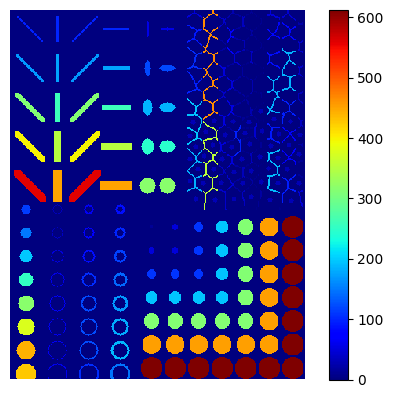

In [8]:
# we're appending a [0] for the "measurement" of the background and attach all values behind
number_of_pixels = np.asarray(statistics_sitk['number_of_pixels'].tolist()).astype(np.float32)
label_ids = np.asarray(statistics_sitk['label'].tolist())

number_of_pixels_map = map_array(label_image, label_ids, number_of_pixels)

imshow(number_of_pixels_map, colorbar=True, colormap="jet")

## Aspect ratio map

In [9]:
statistics_table["aspect_ratio"] = statistics_table["major_axis_length"] / statistics_table["minor_axis_length"]

C:\Users\rober\AppData\Local\Temp\ipykernel_5004\2035852378.py:1: RuntimeWarning: divide by zero encountered in divide
  statistics_table["aspect_ratio"] = statistics_table["major_axis_length"] / statistics_table["minor_axis_length"]
C:\Users\rober\AppData\Local\Temp\ipykernel_5004\2035852378.py:1: RuntimeWarning: invalid value encountered in divide
  statistics_table["aspect_ratio"] = statistics_table["major_axis_length"] / statistics_table["minor_axis_length"]


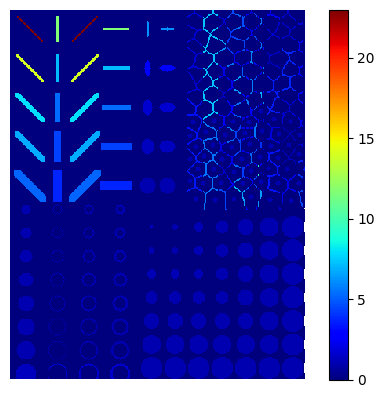

In [10]:
aspect_ratio_map = map_array(label_image, 
                             np.asarray(statistics_table['label'].tolist()),
                             np.asarray(statistics_table['aspect_ratio'].tolist()))

imshow(aspect_ratio_map, colorbar=True, colormap="jet")

## Exercise
Draw a parametric map image of Feret's diameter.